
<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" style="height:150px"> 
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" >Scikit-Learn: classification models</h1> 
<h2 style = "text-align:center">Decision trees</h2> 
<hr style="border-width:2px;border-color:#75DFC1">

>In this exercise we will study an example of using decision trees under Python.<br>
> The packages used will be **pandas**, **scikit-learn** and his sub-packages, in particular **tree** and **model_selection**.

><div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
A major advantage of decision trees is that they can be calculated automatically from databases by supervised learning algorithms.<br>
These algorithms automatically select the discriminating variables from unstructured and potentially bulky data. They can thus make it possible to extract logic rules of cause and effect (determinisms) which did not initially appear in raw data.
</div>

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">0. Introduction to dataset</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

>The database used in this exercise comes from the [UCI ML Restitry](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) and contains data calculated from digitized images of breast masses.<br>
> They describe the characteristics of the cell nuclei present in each image (radius, perimeter, texture, etc.)
La première colonne donne le résultat du diagnostic de chaque masse cellulaire : 'B' for *benign*, 'M' for *malignant*. <br>
> The objective of the exercise is to build a model in the form of a decision tree, to predict whether a cellular mass is benign or smart, depending on the characteristics calculated from the image of its biopsy.

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">1. Data preparation and modeling</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

* **(a)** Load the function **train_test_split** from the under module **sklearn.model_selection**.


* **(b)** Load the class **DecisionTreeClassifier** From the submodle **sklearn.tree**.


* **(c)** Load the library **pandas** under the name **`pd`**.


* **(d)** Read the file *Breast_cancer.csv* in a dataframe named **`bc_data`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Remember that before looking at the solution, you can always access the official Python help by typing <code style = "background-color: transparent ; color : inherit"><b>help(name_function)</b></code> in the console.
</div>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

bc_data = pd.read_csv('breast_cancer.csv')







In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

bc_data = pd.read_csv('breast_cancer.csv', index_col=0)



* **(e)** Show information from Data Frame **bc_data**.



In [7]:
print(bc_data.info())
display(bc_data)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
bc_data.info()



>No variable contains missing values.<br>
>All the variables, with the exception of 'diagnosis' are continuous variables, but the decisions of decisions work as well with discreet or qualitative variables (after dichotomization on *scikit-learn*).<br>
> A glance at the first lines of the data frame shows us that the different variables are not on the same scale, but very little "preprocessing" is necessary during a classification by decision tree.

* **(f)** Create the data frame **data** containing the different *features* and the vector **target** containing the target variable **'diagnosis'**.



In [8]:
data = bc_data.drop(columns=['diagnosis'])
target = bc_data['diagnosis']


In [ ]:
data = bc_data.drop('diagnosis', axis=1)
target = bc_data.diagnosis



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">2. Building a decision tree</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

>In machine learning, a decision tree can be described as a visual representation of a data classification algorithm according to different criteria called decisions (or nodes).<br>Each node corresponds to a test on a learning variable, and each of the following branches represents a result of this test. Each leaf of the tree (terminal nodes) contains a value of the target variable (a label in the case of a classification).
>
> During the training of the model, the nodes are created from "optimal" tests compared to the training set, and the latter ends when the leaves of the trees are homogeneous or check a certain stop criterion.
>
> This decision tree therefore allows, after training on a set of data, to easily carry out predictions in the form of successive logic rules of classification. The results are thus easily interpretable and therefore exploitable, communication around easier modeling. It is therefore a very appreciated classifier used in business.
>
> The construction of a decision tree is done in principle in 2 phases:
>
> The **First phase** consists of building nodes:
>> * From a learning set is engaged in a recursive process of division of the space of data in samples increasingly pure in terms of classes, on the basis of a predefined criterion.
>>
>>
>> * The classification problem is thus broken down into a sequence of (nested) tests relating to a variable, type "`x> = threshold`".
>>
>>
>> * On each node, the best test is selected from a certain criterion (often based on the theory of
Information, and in particular on the concept of entropy), the objective of which is to reduce the mixture of classes as much as possible within each subset created by the different alternatives of the test.
>>
>>
>> * follows a succession of classifications in the form of a tree, each end of which (or "leaf") indicates belonging to a class.
>>
>>
>> * The class allocated to a sheet is determined by the class mainly represented among the data of the learning set which "fall" in this sheet.
>>
>>
>> The objective of this phase is to generate a hierarchical sequence of tests, as short as possible, which successively divides all the learning data into disjoint sub-assemblies, such as cases of cases belonging to the same class are quickly detected.
>
> The **second phase** is pruning :
>> * It consists of removing branches that are not very representative in order to maintain good predictive performance. This step requires the creation of a criterion/metric to designate the branches to be pruned, which will depend on the algorithm used.
>>
>>
>> * After pruning, the branches are replaced by terminal nodes, labeled on the basis of the distribution of learning data (majority class).
>>
>>
>> * In general, the pruningis from the bottom to the top of the tree ("Bottom-up"). It is based on an estimate (crossed validation, new sample, statistical estimate, ...) of the classification error rate: a tree is pruned to a certain node if the error rate estimated at this node (by allocating the majority class) is lower than the error rate obtained by considering the terminal subarbres.
>>
>>
>> * The pruning is successively extended (from the ends) until all the remaining subarbres satisfy the condition on classification error rates.


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">3. Data learning</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> The function [`DecisionTreeClassifier`](http://scikit-learn.org/stable/modles/generated/sklearn.tree.decisionreeClassify.html) allows to create a classifier based on a decision tree. Many parameters can be specified, such as the 'criterion' for evaluating partitions, the maximum depth of the tree, the number of *features* to consider at each node, etc.

* **(a)** Run the following cell to visualize the influence of hyperparameters on a decision tree model.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
The datasets contain two classes (red dots/blue dots) with <b>x0</b> and <b>x1</b> as features. The background color represents the probability of belonging to one of the classes. The redder the color, the greater the probability of belonging to class 2.
</div>



In [9]:
%matplotlib inline
from interactions import show_tree
show_tree()



* **(b)** separate the data set into learning and testing sets, so that the test set represents 20% of the total data.
Add the argument `random_state =123` in the function **`train_test_split`** for the reproducibility of the choice of random.


* **(c)** Create a DecisionTreeClassifier instance named **dt_clf**, with the criterion `criterion='entropy'` and the argument `max_Depth = 4` to specify the maximum number of separation points possible before reaching a leaf node.
Again, add the argument `random_state =123` for the reproducibility of the results.


* **(d)** Train the classifier on the training set.



In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)
dt_clf = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=123)
dt_clf.fit(X_train, y_train)





DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=123)

dt_clf = DecisionTreeClassifier(criterion ='entropy', max_depth=4, random_state=123)
dt_clf.fit(X_train, y_train)



* **(e)** Apply the model to the data set data and store the predictions obtained in the variable **`y_pred`**.


* **(f)** Show a confusion matrix to compare the real and predicted classes.



In [11]:
y_pred = dt_clf.predict(X_test)
cm = pd.crosstab(y_test,y_pred,rownames=['y réel'],colnames=['y prédit'])
display(cm)


y prédit,B,M
y réel,,
B,72,1
M,2,39


In [ ]:
y_pred = dt_clf.predict(X_test)

pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])



>The predictions made on the test sample are encouraging.<br>
>To find out which variables have the most determined the 'diagnosis' of each cell mass, the attribute **`feature_importance_`** returns the ***importance*** normalized of each variable in the construction of the tree.<br>
> In *scikit-learn* the **importance** is defined as the total decrease of the impurity criterion between a node and the next two nodes used to split the node. The greater the difference between the impurity calculated for a node and its ‘child’ nodes, the greater the variable used to divide the node.

* **(g)** Show the 8 most important variables for **`dt_clf`** , as well as their respective importance.



In [12]:
feats = {}
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
display(importances.sort_values(by='Importance', ascending=False).head(8))


,Importance
radius_worst,0.620770
concave points_worst,0.177674
concavity_mean,0.060736
texture_mean,0.051408
texture_worst,0.041369
perimeter_se,0.020865
area_worst,0.016107
smoothness_worst,0.011072


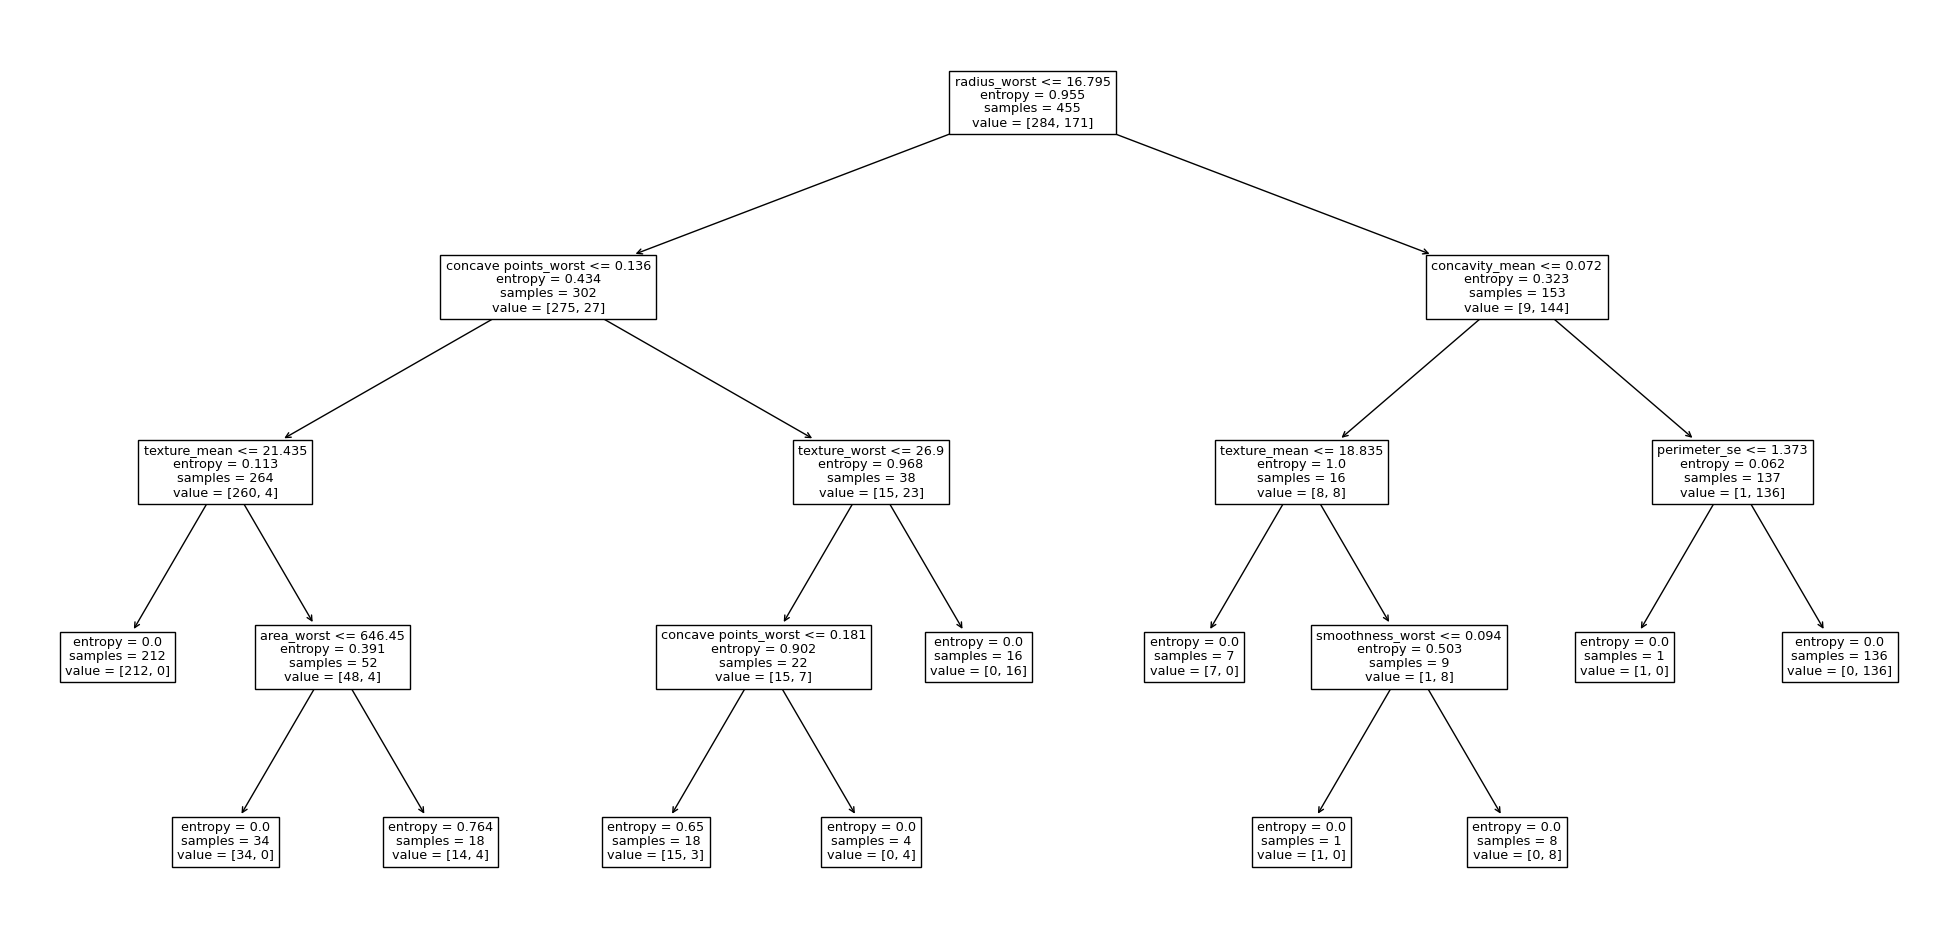

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,12))

from sklearn import tree
tree.plot_tree(dt_clf,feature_names=data.columns);

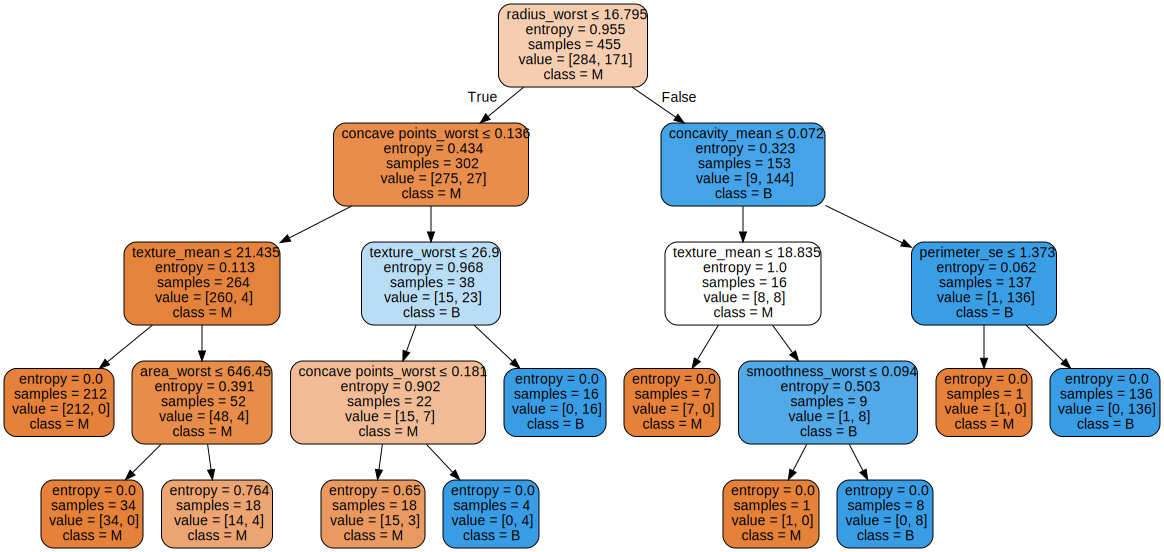

In [14]:
import graphviz 
dot_data = tree.export_graphviz(dt_clf, 
                                out_file=None,
                                feature_names=data.columns,
                                class_names= target.unique(),
                                filled=True, 
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
display(graph)

In [17]:
feats = {}
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(8)


,Importance
radius_worst,0.620770
concave points_worst,0.177674
concavity_mean,0.060736
texture_mean,0.051408
texture_worst,0.041369
perimeter_se,0.020865
area_worst,0.016107
smoothness_worst,0.011072



> Two impurity measures can be used for decision trees in *scikit-learn*: *Information Gain* or *Entropy* and the *Gini index* (more details on these measures [here](https://en.wikipedia.org/wiki/Decision_Learning#)).
>
> In summary, entropy is 0 if all the samples of a node belong to the same class, and entropy is maximum if we have a uniform class distribution (i.e. when all the node classes have an equal probability).
>
> Gini index is similar to entropy, but the choice of the criterion used sometimes gives different classifications.

* **(h)** Create a classifier **`dt_clf_gini`**, having for parameters:`riterion ='gini'`, `max_Depth=4` and` random_state=321'.


* **(i)** Train the new model on the training set (**`x_train`** and **` y_train`**).


* **(j)** Save the predictions of the model on **`x_test`** in **`y_pred`**.


* **(k)** Show the corresponding confusion matrix.



In [18]:
dt_clf_gini = DecisionTreeClassifier(criterion ='gini', max_depth=4, random_state=321)
dt_clf_gini.fit(X_train, y_train)

y_pred = dt_clf_gini.predict(X_test)
cm = pd.crosstab(y_test,y_pred,rownames=['y réel'],colnames=['y prédit'])
display(cm)



y prédit,B,M
y réel,,
B,72,1
M,2,39


In [ ]:
dt_clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=321)
dt_clf_gini.fit(X_train, y_train)
y_pred = dt_clf_gini.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])



* **(l)** Display, as in the previous model, the eight most **important** variables, along with their respective importance scores.



In [19]:
feats = {}
for feature, importance in zip(data.columns, dt_clf_gini.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
display(importances.sort_values(by='Importance', ascending=False).head(8))





,Importance
radius_worst,0.718582
concave points_worst,0.112821
texture_worst,0.048798
concavity_mean,0.033920
texture_mean,0.030343
perimeter_se,0.019178
area_worst,0.016458
smoothness_mean,0.011231


In [ ]:
feats = {}
for feature, importance in zip(data.columns, dt_clf_gini.feature_importances_):
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})

#Affixing of the 8 most important variables
importances.sort_values(by='Gini-importance', ascending=False).head(8)



> The trees corresponding to the classifiers created can be displayed thanks to the function [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
> Visualizing the tree is important for understanding how the model works and how it can potentially be improved (for example, by removing a variable that promotes overfitting).
>
> Here are the trees corresponding to the two models created:

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">4. Tree with the "entropy" criterion</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

><img  src="https://datascientest.fr/train/assets/entropytree.jpg" style = "height:500px" />

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">5. Tree with the "Gini" criterion</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

><img  src="https://datascientest.fr/train/assets/ginitree.jpg" style = "height:500px" />
>
>The first summit is the root of the tree. It is located on the first level. The tree contains the frequency distribution of the variable to be predicted `diagnosis`. 455 variables are used for the construction of the tree.<br>
> In both cases, the variable `radius_worst` is the first variable used. It is called the segmentation variable. It therefore produces two wire knots, and so on, until a pure class is obtained, where until the number of nodes created reaches the maximum authorized number (here equal to 4).

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">Synthesis</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

>Decision-based algorithms make it possible to respond simply and quickly to a classification problem. They do not formulate hypotheses about data and are not affected by the problems of scales for measuring variables.<br>
> They can manage both digital and categorical variables, and are easily interpreted.
>
>However, decision -making models can be quite unstable: they are sensitive to (even fairly low) variations in the learning set in terms of samples or variables considered.<br>
> Sometimes, decision trees are also very complex, and badly generalize the learning set (*overfitting*). Additional pruning procedures are used to get around this problem, certain approaches such as **random forests** allow you to get rid of it.

